# ORIE 4580/5580/5581 Assignment 5

#### Students: Raymond Tao (st2242) and Xiaotong Tan (xt254)

### Github link: [ORIE 5580 HW5](https://github.com/raymondtaj/orie5580/blob/main/HW5/HW5.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.

Let each bird’s weekly visits to the feeder follow a Poisson process with rate $\lambda$ per week.  
The probability that a given bird visits the feeder at least once in a week is

$$
p = 1 - e^{-\lambda}.
$$

The researcher tagged 10 birds, and observed an average of 6 tagged birds visiting per week.  
Hence, the sample estimate of $p$ is

$$
\hat{p} = \frac{6}{10} = 0.6.
$$

Using the relationship $p = 1 - e^{-\lambda}$, we solve for $\lambda$:

$$
\hat{\lambda} = -\ln(1 - \hat{p}) = -\ln(0.4) = \ln(2.5) \approx 0.916.
$$

Let $N$ denote the total population of red-tailed hawks.  
The expected number of distinct birds (tagged and untagged) visiting per week is $N p$.  
Given that the researcher observed an average of 28.8 total birds per week, we have

$$
28.8 = N \hat{p} \quad \Rightarrow \quad \hat{N} = \frac{28.8}{0.6} = 48.
$$

$$
\hat{N} = 48
$$

Therefore, the method of moments estimate for the total red-tailed hawk population is approximately 48.



<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.


Let $N$ be the total number of red-tailed hawks in Ithaca.  
There are 10 tagged birds, so the proportion of tagged birds in the population is $\frac{10}{N}$.

During the observation week, 20 unique birds were observed, of which 4 were tagged.  
Assuming each observed bird is equally likely to be tagged or untagged,  
the number of tagged birds among the 20 follows a Binomial distribution:

$$
X \sim \text{Binomial}\left(20, \frac{10}{N}\right),
$$

where $X = 4$.

The likelihood function is therefore

$$
L(N) \propto \left(\frac{10}{N}\right)^4 \left(1 - \frac{10}{N}\right)^{16}.
$$

Taking the log-likelihood and differentiating with respect to $N$:

$$
\ell(N) = 4 \ln(10) - 4 \ln(N) + 16 \ln\left(1 - \frac{10}{N}\right),
$$

$$
\frac{d\ell}{dN} = -\frac{4}{N} + 16 \cdot \frac{10/N^2}{1 - 10/N} = 0.
$$

Simplify:

$$
-\frac{4}{N} + \frac{160}{N(N - 10)} = 0.
$$

Multiply both sides by $N(N - 10)$:

$$
-4(N - 10) + 160 = 0.
$$

$$
-4N + 40 + 160 = 0 \quad \Rightarrow \quad N = 50.
$$

$$
\hat{N}_{\text{MLE}} = 50.
$$

Therefore, the maximum likelihood estimate for the hawk population size in Ithaca is **50**.



<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.


Let the (uncensored) daily demand be $N \sim \mathrm{Geom}(p)$ with
$\mathbb{P}(N=k)=(1-p)^k p$ for $k=0,1,2,\dots$.
Since at most 40 servings are prepared, the observed sales are
$$
Y=\min\{N,40\}.
$$
Hence the pmf of $Y$ is
$$
\mathbb{P}(Y=y)=
\begin{cases}
(1-p)^y\,p, & y=0,1,\dots,39,\\[4pt]
\mathbb{P}(N\ge 40)=\displaystyle\sum_{k=40}^{\infty}(1-p)^k p=(1-p)^{40}, & y=40,\\[4pt]
0, & \text{otherwise.}
\end{cases}
$$


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize_scalar


df = pd.read_csv("Soup_sales_data.csv")

# Define the log-likelihood for censored geometric data
def neg_log_likelihood(p, y, censor_limit=40):
    if p <= 0 or p >= 1:
        return np.inf
    uncensored = y[y < censor_limit]
    censored = y[y == censor_limit]
    ll_uncensored = np.sum(np.log(p) + uncensored * np.log(1 - p))
    ll_censored = len(censored) * np.log((1 - p)**censor_limit)
    return -(ll_uncensored + ll_censored)

# Optimize p
res = minimize_scalar(neg_log_likelihood, bounds=(1e-6, 1-1e-6), args=(df["Y"],), method="bounded")
p_hat = res.x
p_hat


0.02679533641953299

<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

Let $n$ people have birthdays drawn i.i.d. uniformly over $d=365$ days. 


The probability of no shared birthday is
$$P_0(n)
=\frac{d}{d}\cdot\frac{d-1}{d}\cdots\frac{d-(n-1)}{d}
=\frac{d(d-1)\cdots(d-n+1)}{d^n}$$


Hence the probability that at least two people share a birthday is
$$P_{\ge 1}(n)
=1-P_0(n)
=1-\frac{365*364*\cdots(365-n+1)}{365^n}$$

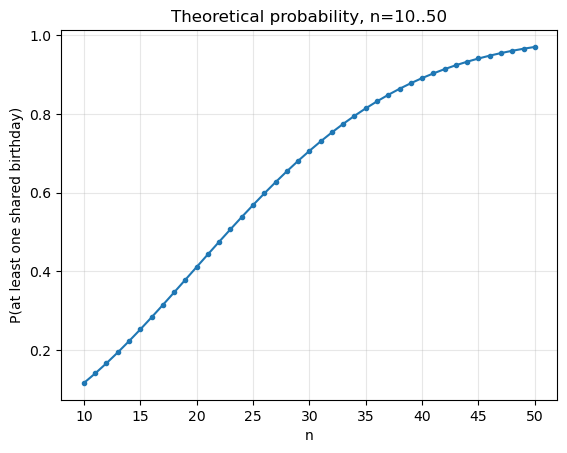

In [2]:
import matplotlib.pyplot as plt
from scipy import stats as st

def p_at_least_one(n, days=365):
    if n <= 1:
        return 0
    if n > days:
        return 1
    log_no_match = np.sum(np.log(np.arange(days, days - n, -1))) - n * np.log(days)
    return 1 - np.exp(log_no_match)

ns_a = np.arange(10, 51)
p_theory = np.array([p_at_least_one(n) for n in ns_a])

plt.figure()
plt.plot(ns_a, p_theory, marker='o', ms=3)
plt.xlabel('n')
plt.ylabel('P(at least one shared birthday)')
plt.title('Theoretical probability, n=10..50')
plt.grid(alpha=0.3)
plt.show()


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

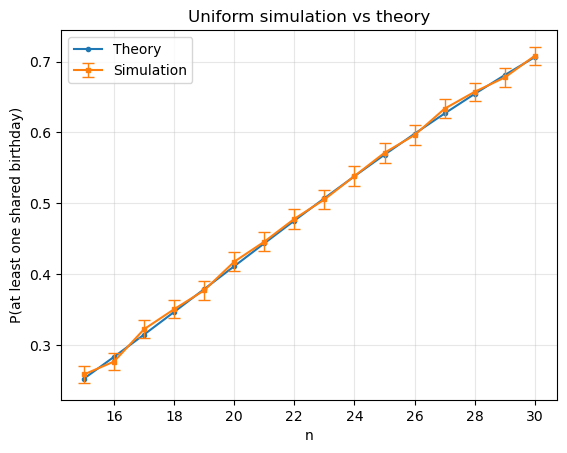

In [3]:
ns = np.arange(15, 31)

def wilson_ci(k, n, alpha = 0.05):
    z = st.norm.ppf(1 - alpha/2)
    phat = k / n
    denom = 1 + (z*z)/n
    center = phat + (z*z)/(2*n)
    adj = z * np.sqrt((phat*(1-phat))/n + (z*z)/(4*n*n))
    lo = (center - adj) / denom
    hi = (center + adj) / denom
    return (max(0.0, lo), min(1.0, hi))

def simulate_shared_uniform(n, trials = 5000, days = 365):
    rng = np.random.default_rng()
    hits = 0
    for _ in range(trials):
        birthdays = rng.integers(0, days, size=n)
        if np.unique(birthdays).size < n:
            hits += 1
    phat = hits / trials
    return phat, wilson_ci(hits, trials, alpha=0.05)

theory_b = np.array([p_at_least_one(n) for n in ns])
sim_b, ci_b = [], []
for n in ns:
    phat, (lo, hi) = simulate_shared_uniform(n)
    sim_b.append(phat); ci_b.append((lo, hi))
sim_b, ci_b = np.array(sim_b), np.array(ci_b)

plt.figure()
plt.plot(ns, theory_b, marker='o', ms=3, label='Theory')
plt.errorbar(
    ns, sim_b,
    yerr=[sim_b - ci_b[:,0], ci_b[:,1] - sim_b],
    fmt='s',
    ms=3,
    linestyle='-',
    capsize=4,
    elinewidth=1,
    markeredgewidth=1,
    label='Simulation'
)
plt.xlabel('n')
plt.ylabel('P(at least one shared birthday)')
plt.title('Uniform simulation vs theory')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

In [4]:
raw = []
with open("bdaydata.txt", "r") as f:
    tokens = f.read().split()
i = 0
while i < len(tokens):
    s = tokens[i]
    if s.isdigit() and len(s) == 4:
        date = s
        if i+1 < len(tokens) and tokens[i+1].isdigit():
            raw.append((date, int(tokens[i+1])))
            i += 2
        else:
            i += 1
    else:
        i += 1
df = pd.DataFrame(raw, columns=["date","count"])

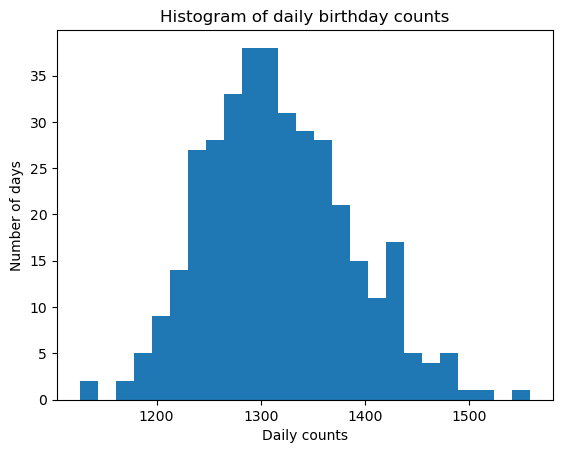

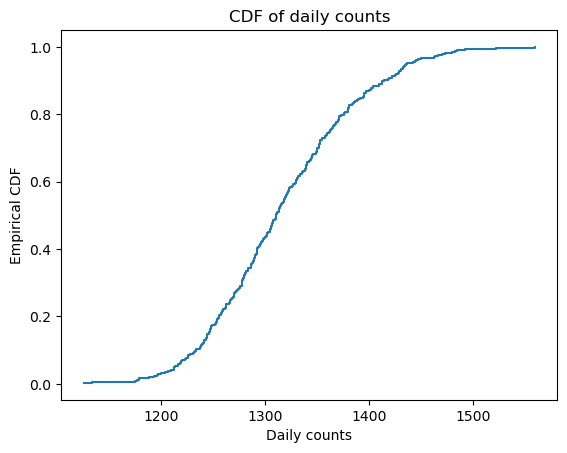

In [5]:
counts = df["count"].to_numpy()
N = counts.sum()
m = len(counts)

# Histogram
plt.figure()
plt.hist(counts, bins=25)
plt.xlabel('Daily counts')
plt.ylabel('Number of days')
plt.title('Histogram of daily birthday counts')
plt.show()

# CDF
xs = np.sort(counts)
ys = np.arange(1, m+1) / m
plt.figure()
plt.step(xs, ys, where='post')
plt.xlabel('Daily counts')
plt.ylabel('Empirical CDF')
plt.title('CDF of daily counts')
plt.show()

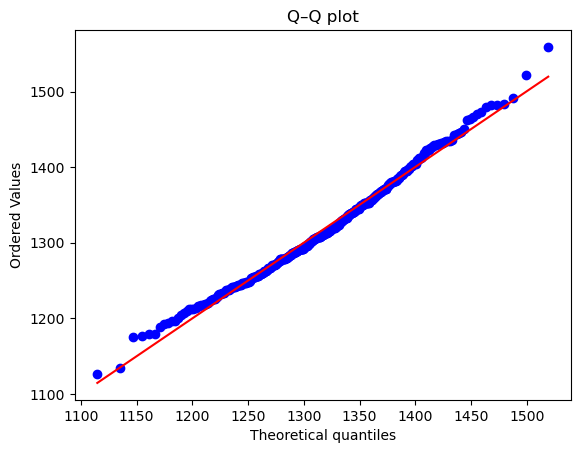

In [6]:
## Q-Q plot
mu = counts.mean()
sigma = counts.std()

fig = plt.figure()
st.probplot(counts, dist="norm", sparams=(mu, sigma), plot=plt)
plt.title("Q–Q plot")
plt.show()

## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [7]:
## Chi-square test
expected = N / m
chi2_stat = np.sum((counts - expected)**2 / expected)
dfree = m - 1
chi2_p = st.chi2.sf(chi2_stat, dfree)
print(f"Chi-square: χ² = {chi2_stat:.2f} with df = {dfree}  (p-value = {chi2_p:.3e})")

Chi-square: χ² = 1352.72 with df = 364  (p-value = 1.249e-113)


In [8]:
## K-S test
days_idx = np.repeat(np.arange(1, m+1), counts)
sample_u = days_idx / m
ks_res = st.kstest(sample_u, 'uniform')
print(f"Kolmogorov–Smirnov: D = {ks_res.statistic:.4f}  (p-value = {ks_res.pvalue:.3e})")

Kolmogorov–Smirnov: D = 0.0155  (p-value = 7.950e-101)


Both the Chi-square test and the Kolmogorov–Smirnov test have p-values close to zero. This means that the observed daily birthday counts deviate significantly from uniform distribution.

<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


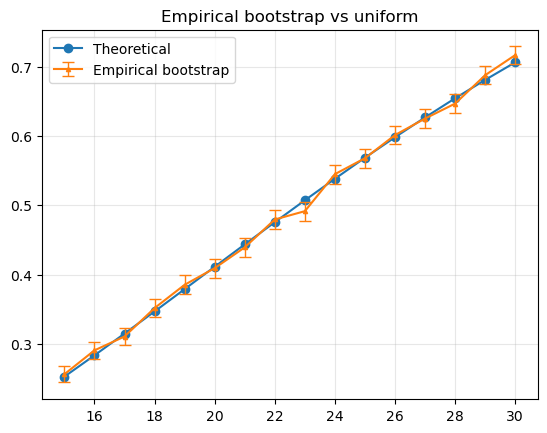

In [9]:
probs = counts / counts.sum()

def simulate_shared_from_probs(n, probs, trials = 5000):
    rng = np.random.default_rng()
    m = probs.size
    hits = 0
    for _ in range(trials):
        draws = rng.choice(m, size=n, p=probs)
        if np.unique(draws).size < n:
            hits += 1
    phat = hits / trials
    return phat, wilson_ci(hits, trials, alpha=0.05)

emp_est, emp_ci = [], []
for n in ns:
    phat, (lo, hi) = simulate_shared_from_probs(n, probs)
    emp_est.append(phat); emp_ci.append((lo, hi))
emp_est, emp_ci = np.array(emp_est), np.array(emp_ci)

plt.figure()
plt.plot(ns, theory_b, marker='o', label='Theoretical')
plt.errorbar(
    ns, 
    emp_est,
    yerr=[emp_est - emp_ci[:,0], emp_ci[:,1] - emp_est],
    fmt='^', 
    ms=3, 
    linestyle='-',
    capsize=4, 
    elinewidth=1, 
    markeredgewidth=1,
    label='Empirical bootstrap'
)
plt.title('Empirical bootstrap vs uniform')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


Comparing the bootstrap estimate with the plot in part b, in the data the empirical curve is slightly above the uniform curve for typical n (seasonality and heaping increase collision chances modestly). 

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

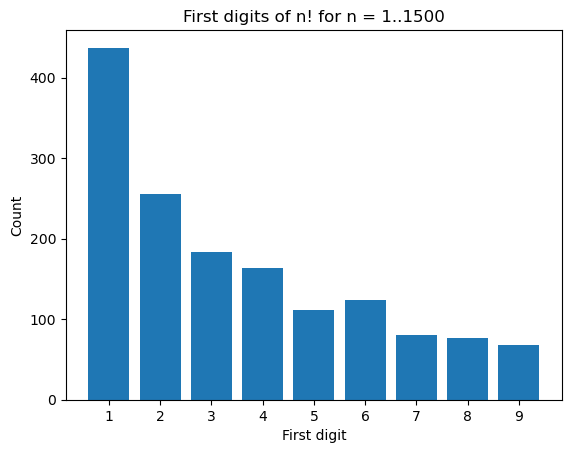

In [10]:
from math import factorial
n = 1500
first_digit = np.zeros(n, dtype=int)

for i in range(n):
    f = factorial(i+1)
    first_digit[i] = int(str(f)[0])

digits = np.arange(1, 10)
fact_counts = pd.Series(first_digit).value_counts().sort_index()
fact_counts = fact_counts.reindex(digits, fill_value=0)
plt.figure()
plt.bar(digits, fact_counts.values, tick_label=digits)
plt.title("First digits of n! for n = 1..1500")
plt.xlabel("First digit")
plt.ylabel("Count")
plt.show()

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [11]:
import mpmath as mp

def chisquare_test(observed, expected_probs):
    observed = np.asarray(observed, dtype=float)
    expected_probs = np.asarray(expected_probs, dtype=float)
    n = observed.sum()
    expected = n * expected_probs
    eps = 1e-12
    expected = np.where(expected == 0, eps, expected)
    chi2 = ((observed - expected) ** 2 / expected).sum()
    dof = len(observed) - 1
    p = mp.gammainc(dof/2, chi2/2, mp.inf) / mp.gamma(dof/2)

    print('chi2:', chi2)
    print('dof:', dof)
    print('p_value:', p)

In [12]:
uniform_probs = np.ones(9) / 9
chisquare_test(fact_counts.values, uniform_probs)

chi2: 667.5120000000002
dof: 8
p_value: 7.04135769230937e-139


Since the p-value is close to zero, we can reject the null hypothesis that the distribution follows the uniform distribution.

<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [13]:
benford_probs = np.log10(1 + 1/digits)
chisquare_test(fact_counts.values, benford_probs)

chi2: 9.768287282336871
dof: 8
p_value: 0.281667279637231


Since the p-value is greater than 0.05, at the 5% significance levels, the hypothesis that the data follows a Benford distribution cannot be rejected.

<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

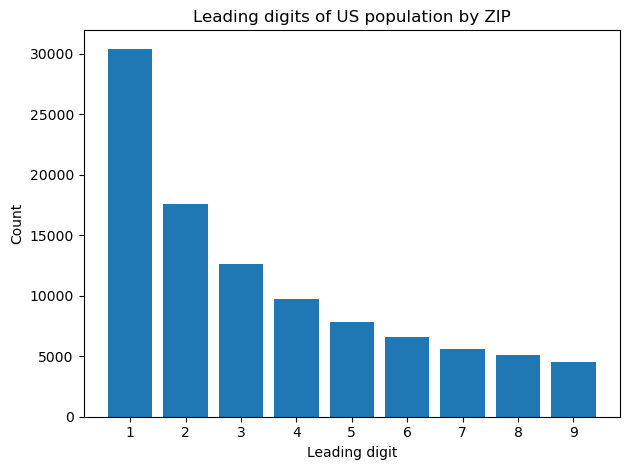

Chi-sqaure test: data versus uniform
chi2: 50323.53572
dof: 8
p_value: 6.41486404024989e-10916
Chi-sqaure test: data versus Benford
chi2: 11.843226818111061
dof: 8
p_value: 0.158336981378489


In [14]:
us_pop = pd.read_csv('us_pop.csv')

pop_leads = [int(str(x)[0]) for x in us_pop['population'].values]
pop_leads = [d for d in pop_leads if d is not None and 1 <= d <= 9]
pop_counts = pd.Series(pop_leads).value_counts().sort_index().reindex(digits, fill_value=0)

plt.figure()
plt.bar(digits, pop_counts.values, tick_label=digits)
plt.title(f"Leading digits of US population by ZIP")
plt.xlabel("Leading digit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print('Chi-sqaure test: data versus uniform')
pop_chi_uniform = chisquare_test(pop_counts.values, uniform_probs)
print('Chi-sqaure test: data versus Benford')
pop_chi_benford = chisquare_test(pop_counts.values, benford_probs)

Based on the Chi-square test result, the conclusion stays the same with the synthetic data. Specicially, because the p-value of the chi-square test against a uniform distribution is close to zero, we reject the null hypothesis that the data follow a uniform distribution. In contrast, the p-value for the chi-square test against Benford’s distribution exceeds 0.05, so at the 5% significance level we do not reject the hypothesis that the data follow Benford’s distribution.

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.